In [2]:
import pandas as pd
import numpy as np
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [3]:
df = pd.read_csv('data/data.csv', encoding='latin-1')
df = df[['Prod_Budget', 'Runtime', 'Total_Torrents']]
print(len(df))
print(df.head())

1653
   Prod_Budget  Runtime  Total_Torrents
0  425000000.0      162          1450.0
1  300000000.0      148           647.0
2  275000000.0      164           861.0
3  275000000.0      132           723.0
4  260000000.0      100           563.0


In [4]:
df['Runtime'].describe()

count    1653.000000
mean      110.065941
std        18.261913
min        72.000000
25%        97.000000
50%       107.000000
75%       120.000000
max       229.000000
Name: Runtime, dtype: float64

In [8]:
buckets = [0, 80, 100, 120, 140, 160, 180, 200, 300]
labels = ['0-80', '80-100', '100-120', '120-140', '140-160', '160-180', '180-200', '200+']

df['Runtime_Bin'] = pd.cut(df['Runtime'], buckets, labels=labels)
df = df.sort_values(['Runtime'], ascending=True)

#print(df['Runtime_Bin'].value_counts())

In [5]:
#df.sort_values('Runtime', ascending=False)

In [6]:
# dictionary - runtime bucket counts
duration = df['Runtime_Bin'].value_counts().to_dict()

import operator
srt = sorted(duration.items(), key=operator.itemgetter(1))
srt = srt[::-1]
print(srt)

[('100-120', 711), ('80-100', 540), ('120-140', 308), ('140-160', 58), ('160-180', 18), ('180-200', 8), ('0-80', 7), ('200+', 3)]


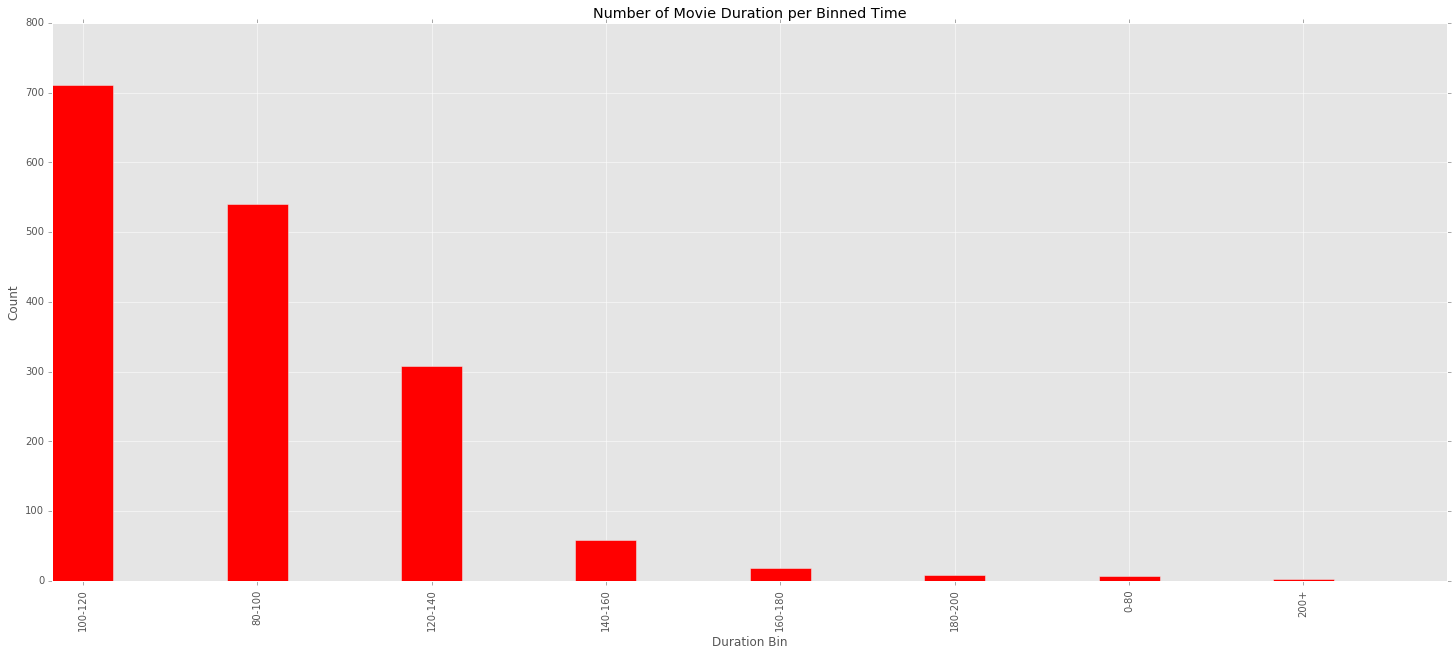

In [7]:
plt.figure(figsize=(25,10))

ind = np.arange(len(duration)) # the x locations for the groups
width = 0.35 # the width of the bars

bar_bin = [n_bin for n_bin, count in srt]
bar_count = [count for n_bin, count in srt]

plt.bar(ind, bar_count, width, color='r')

plt.ylabel('Count')
plt.xlabel('Duration Bin')
plt.title('Number of Movie Duration per Binned Time')
plt.xticks(ind + width/2., (bar_bin), rotation='vertical')
plt.yticks(np.arange(0, 801, 100))

plt.show()

711


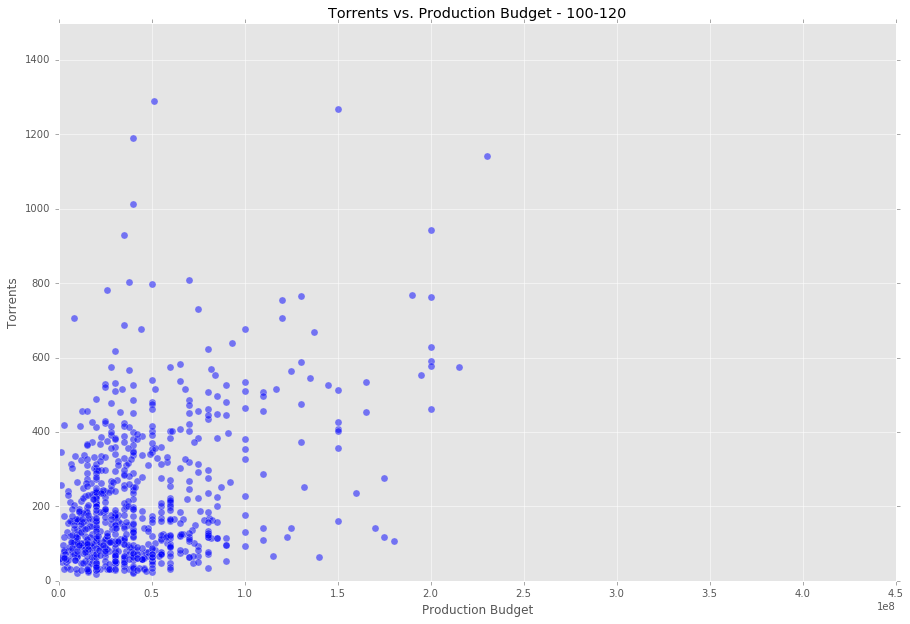

In [8]:
term = '100-120'
df_a = df.loc[df['Runtime_Bin'] == term]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

540


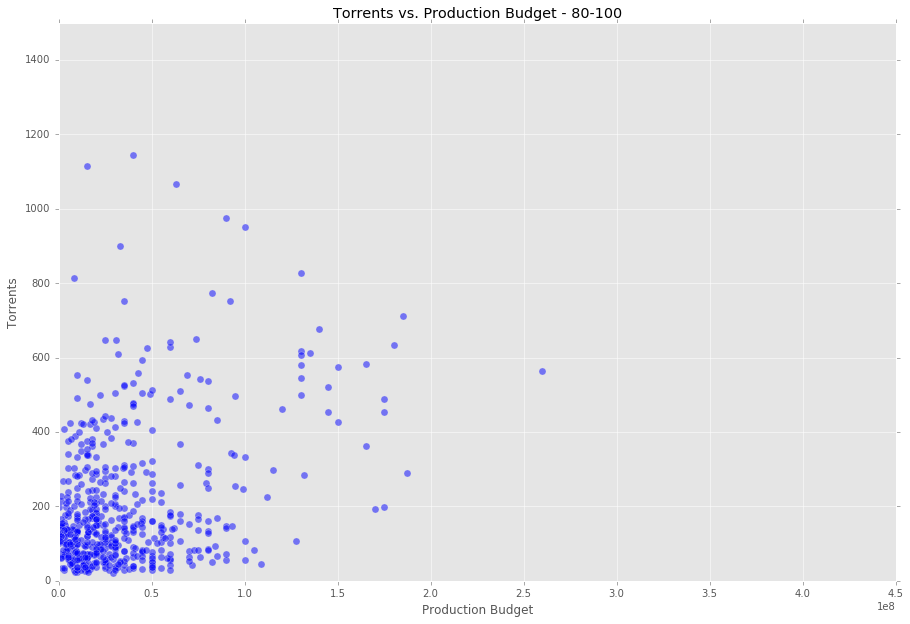

In [9]:
term = '80-100'
df_a = df.loc[df['Runtime_Bin'] == term]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

308


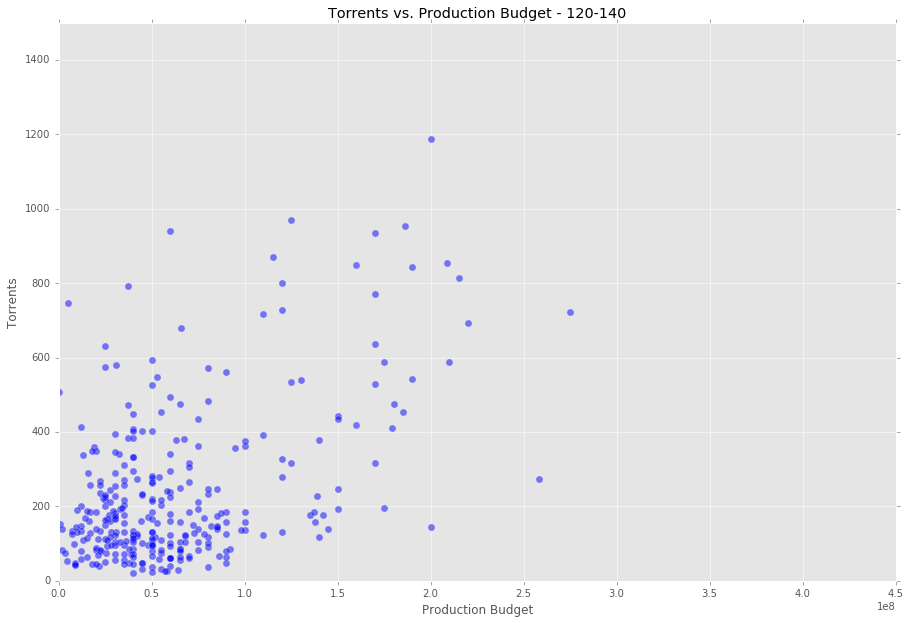

In [10]:
term = '120-140'
df_a = df.loc[df['Runtime_Bin'] == term]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

In [11]:
df_sub = df[['Prod_Budget', 'Runtime', 'Runtime_Bin', 'Total_Torrents']]
df_sub.describe()

,Prod_Budget,Runtime,Total_Torrents
count,1.653000e+03,1653.000000,1653.000000
mean,4.766387e+07,110.065941,223.719903
std,4.434656e+07,18.261913,196.768665
min,6.800000e+04,72.000000,17.000000
25%,1.800000e+07,97.000000,89.000000
50%,3.500000e+07,107.000000,158.000000
75%,6.000000e+07,120.000000,299.000000
max,4.250000e+08,229.000000,1450.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10da97dd8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e6996a0>]], dtype=object)

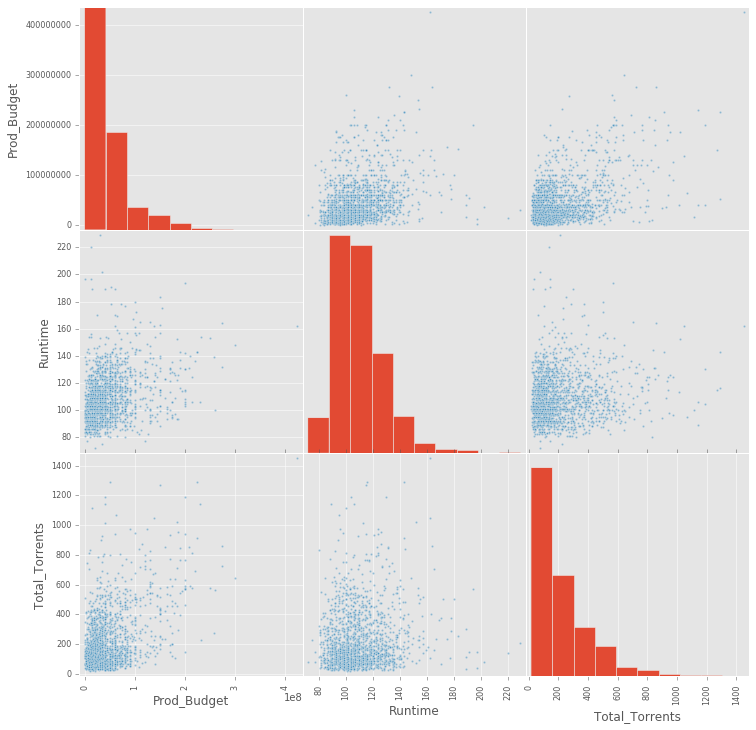

In [12]:
# Lets take a look at our entire model
plt.rcParams['figure.figsize'] = (12, 12)
pd.tools.plotting.scatter_matrix(df_sub)

In [13]:
# select only runtime bins of significance
duration = ['80-100', '100-120', '120-140']
df_sub = df_sub.loc[df_sub['Runtime_Bin'].isin(duration)]
#df_sub.sort_values('Runtime', ascending=False)
df_sub.describe()

,Prod_Budget,Runtime,Total_Torrents
count,1.559000e+03,1559.000000,1559.000000
mean,4.520814e+07,107.516998,217.813342
std,4.073281e+07,13.866022,189.804366
min,6.800000e+04,81.000000,17.000000
25%,1.800000e+07,97.000000,86.000000
50%,3.500000e+07,106.000000,153.000000
75%,6.000000e+07,117.000000,292.500000
max,2.750000e+08,140.000000,1291.000000


In [14]:
from patsy import dmatrices

y, x = dmatrices('Total_Torrents ~ Prod_Budget + Runtime_Bin', data=df_sub, return_type='dataframe')

In [15]:
y.head()

,Total_Torrents
974,119.0
1083,276.0
611,293.0
395,258.0
1261,40.0


In [16]:
x.head()

,Intercept,Runtime_Bin[T.80-100],Runtime_Bin[T.100-120],Runtime_Bin[T.120-140],Runtime_Bin[T.140-160],Runtime_Bin[T.160-180],Runtime_Bin[T.180-200],Runtime_Bin[T.200+],Prod_Budget
974,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,28000000.0
1083,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25000000.0
611,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,47000000.0
395,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,65000000.0
1261,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18000000.0


In [17]:
import statsmodels.api as sm
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Total_Torrents   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     115.8
Date:                Thu, 14 Jul 2016   Prob (F-statistic):           1.15e-67
Time:                        12:54:24   Log-Likelihood:                -10233.
No. Observations:                1559   AIC:                         2.047e+04
Df Residuals:                    1555   BIC:                         2.050e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 93.0431      5.251     17.719      0.000        82.743   103.343
Runtime_Bin[T.80-100]     38.8554      6.270      6.197      0.000        26.556    51.155
Runtime_Bin[T.100-120]    35.0983      5.794      6.057      0.000        23.733    46.464
Runtime_Bin[T.120-140]    19.0894      8.297      2.301      0.022         2.815    35.364
Runtime_Bin[T.140-160]          0          0        nan        nan             0         0
Runtime_Bin[T.160-180]          0          0        nan        nan             0         0
Runtime_Bin[T.180-200]          0          0        nan        nan             0         0
Runtime_Bin[T.200+]             0          0        nan        nan             0         0
Prod_Budget             2.025e-06    1.1e-07     18.422      0.000      1.81e-06  2.24e-06
==============================================================================
Omnibus:                      528.439   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2022.858
Skew:                           1.620   Prob(JB):                         0.00
Kurtosis:                       7.544   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [18]:
import statsmodels.formula.api as smf

results = smf.ols(formula='Total_Torrents ~ Prod_Budget + Runtime', data=df_sub,).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Total_Torrents   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     173.7
Date:                Thu, 14 Jul 2016   Prob (F-statistic):           8.44e-69
Time:                        12:54:24   Log-Likelihood:                -10233.
No. Observations:                1559   AIC:                         2.047e+04
Df Residuals:                    1556   BIC:                         2.049e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     180.3873     34.203      5.274      0.000       113.299   247.475
Prod_Budget  2.026e-06    1.1e-07     18.382      0.000      1.81e-06  2.24e-06
Runtime        -0.5037      0.324     -1.556      0.120        -1.139     0.131
==============================================================================
Omnibus:                      530.257   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2040.827
Skew:                           1.624   Prob(JB):                         0.00
Kurtosis:                       7.568   Cond. No.                     4.78e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
model.score(x, y)

0.18257010205162227

In [21]:
model.coef_

array([[  0.00000000e+00,   7.84100394e+00,   4.08396474e+00,
         -1.19249687e+01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.02470736e-06]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110d3ed68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11118ef60>]], dtype=object)

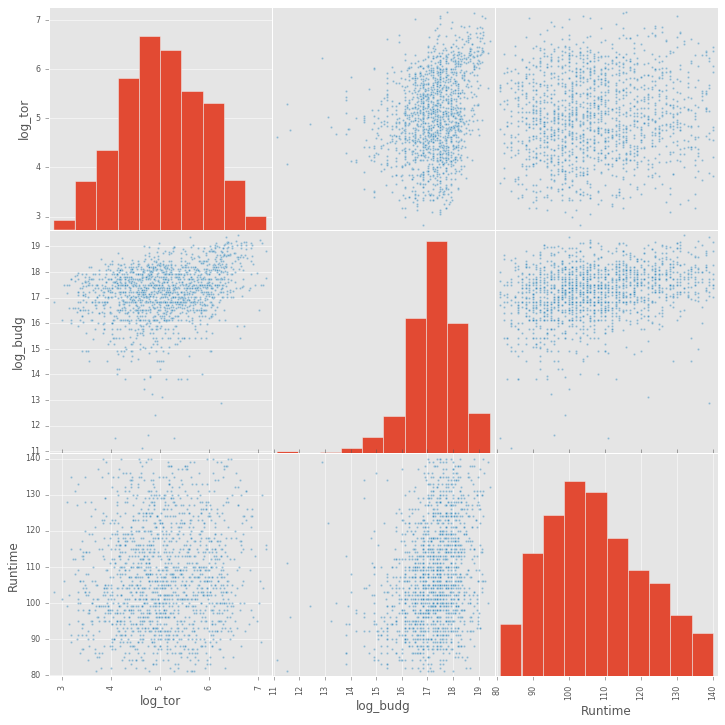

In [22]:
df_sub['log_tor']=np.log(df_sub.Total_Torrents)
df_sub['log_budg']=np.log(df_sub.Prod_Budget)

trans=df_sub[['log_tor','log_budg', 'Runtime']]
pd.tools.plotting.scatter_matrix(trans)

---
# Log Transform

In [23]:
y, x = dmatrices('log_tor ~ log_budg + Runtime_Bin', data=df_sub, return_type='dataframe')
x.head()

,Intercept,Runtime_Bin[T.80-100],Runtime_Bin[T.100-120],Runtime_Bin[T.120-140],Runtime_Bin[T.140-160],Runtime_Bin[T.160-180],Runtime_Bin[T.180-200],Runtime_Bin[T.200+],log_budg
974,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17.147715
1083,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17.034386
611,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17.665658
395,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17.989898
1261,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16.705882


In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

model.score(x,y)

0.073685340555054601

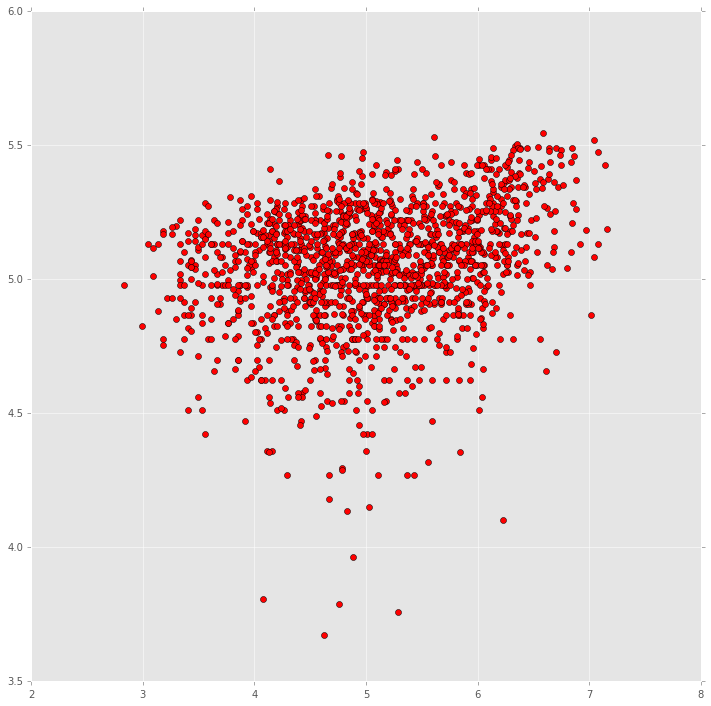

In [25]:
_ = plt.plot(y, model.predict(x), 'ro')

In [26]:
from sklearn import cross_validation as cv
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(x,y,test_size=0.333,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

In [27]:
metrics.mean_squared_error(y_train,model.predict(x_train))

0.62742759681345628

In [28]:
model.score(x_train, y_train)

0.073200103341476197

In [29]:
metrics.mean_squared_error(y_test,model.predict(x_test))

0.66977409472290217

In [30]:
# reset x, y otherwise errors occur
y, x = dmatrices('log_tor ~ log_budg + Runtime_Bin', data=df_sub, return_type='dataframe')

from sklearn.cross_validation import KFold
kf = KFold(len(df_sub), n_folds=100, shuffle=True)

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf2 = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])

clf2.score(x,y)

0.073780403466258249